<a href="https://colab.research.google.com/github/mrozgurer/Used-Cars-Pricing-Project/blob/main/Used-Cars-Pricing-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries and reading the data file#

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# The code below allows me to see all the columns and 200 rows in a dataset when I print it
# The default for the numbers of rows shown is 10. If you set it to None, then it shows all the rows or columns. You can set it to whatever number you want.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

NameError: ignored

In [ ]:
#index_col allows to set which columns to be used as the index of the dataframe. The default value is None, and pandas will add a new column start from 0 to specify the index column.
data=pd.read_csv('/content/drive/MyDrive/datasets/used_cars_data.csv', index_col=0)
ucars=data.copy()

#Introduction: Problem statement, research questions, and data background#



Used car market has become very popular and dynamic in India, because people have started to prefer used cars over new cars for some reasons. The production of new cars has dramatically dropped for reasons like global chip shortage, which has resulted in radical increase in their price. Also, the global economic crisis and increased inflation, especially due to pandemic, has been leading people to find out more budget-friendly alternatives to everything including cars. 

The problem is that unlike the market for new cars where prices are mostly determined by manufacturer, hence predictable, the market for used cars is very chaotic in terms of car prices, because each owner can determine a price for his or her car, without much justification or rationally analyzing the market.

Therefore, as a data scientist in Cars4U which is a tech start-up that wants to be a key player in this market in India, I have to empirically answer the following research question: "What are the factors that successfully predict the price of a used car in India?" 

I should build a model that could empirically answer that question based on the dataset and test the performance of that model to see if it really fits the data.

In [ ]:
# First, let's look at the dimensions of the dataset

# f-string is a new feature in the newest version of Python, and it allows you to modify strings by plugging in functions, methods etc. in curved brackets

print(f'There are {ucars.shape[0]} rows and {ucars.shape[1]} columns in the dataset')

#The output shows that it is not a very huge dataset.

There are 7253 rows and 13 columns in the dataset


In [ ]:
np.random.seed(1) #This code allows you to generate the same 15 random rows, when it is set up to 1 (only 1 seed -or set of random values)
ucars.sample(15) # df.sample() allows you to generate a specific number of random rows from the dataset, so you do not restrict yourself with the first 5 or last 5 rows which sometimes tend to be biased

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.470,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.440,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.290,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.970,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.230,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.050,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.970,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.100,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.250,2.50


In [ ]:
ucars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.3+ KB


We see from the table and output above that the strings in numerical variables such as Mileage, Engine, and Power should be removed, and those variables should be made numerical. Also, the variable Name has very different strings, which should be organized properly. 

In [ ]:
ucars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [ ]:
ucars.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


Above: The prices of all the last five cars are NaN, meaning that they are missing. It can mean a pattern in missingness. We will check that later.

In [ ]:
ucars.duplicated().sum()

1

In [ ]:
# There are 1 duplicated row, so I need to drop them

ucars.drop_duplicates(inplace=True) # Dropping the duplicate entries from the dataset
ucars.reset_index(drop=True,inplace=True) # We reset the index of the dataframe because some of the rows had been removed (but they will still be there as blank rows, if we do not reset the rows)
#inplace=True changes the original dataset based on your code. The default is inplace=False which just creates the copy of your original dataset...
#...rather than making permanent changes on it
#drop=True removes the column newly created by reset_index, the column which includes the values from your removed row

In [ ]:
# Also, I should remove the strings in numerical columns and make those columns integer or float, so I can use them in all types of quantitative analyses later.

def string_removal(milengpow):
  if isinstance(milengpow, str):
    return float(milengpow.split(' ')[0])
  else:
    return np.nan

mep=['Mileage','Engine','Power']

for colname in mep:
  ucars[colname]=ucars[colname].apply(string_removal)

ucars[mep].head()

,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


#Processing Columns#






The first thing we should do in data analysis is to decide if we should drop any column that is not very relevant to our research question. Why do we want to drop an irrelevant column? It is because more column means more variable and parameter that enters the model, and more variable means a more complex model. We are looking for a model that does not only explain the variance accounted for by our predictors, but also is as simple as possible. Irrelevant variables make our model unneccesarily complex. 

Deciding which columns are not very relevant to our research question requires knowledge on the domain the dataset is about. 

First, we should look at the correlation table and see the correlation between numerical variables.


In [ ]:
ucars.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187884,0.322452,-0.054726,0.013448,0.008166,-0.006323,0.305327
Kilometers_Driven,-0.187884,1.000000,-0.069125,0.094816,0.030165,0.090218,0.015497,-0.011493
Mileage,0.322452,-0.069125,1.000000,-0.593581,-0.531770,-0.310649,-0.406012,-0.306593
Engine,-0.054726,0.094816,-0.593581,1.000000,0.859777,0.399256,0.697206,0.658354
Power,0.013448,0.030165,-0.531770,0.859777,1.000000,0.095910,0.803484,0.772566
Seats,0.008166,0.090218,-0.310649,0.399256,0.095910,1.000000,0.037504,0.052225
New_Price,-0.006323,0.015497,-0.406012,0.697206,0.803484,0.037504,1.000000,0.763362
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,0.763362,1.000000


**DECISION:** As we see, there is a very high correlation between Engine and Power. It is expected, because engine with higher cc means higher power of the engine. Since they are highly correlated and have similar meanings, we can drop one of them. Which one should we drop? To decide, we can look at which one has more outliers and missing values. 

In [ ]:
# The code below will indirectly show us the number of missing values which is the number of entries minus non-null count

ucars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   float64
 8   Engine             7206 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.7+ KB


In [ ]:
# The code below returns the 1st and 3rd quantiles and then, it gives the exact values at lower and upper whiskers. We need those values to calculate the number of outliers later.

ucars_boxplots=['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','New_Price','Price']

Q1=ucars[ucars_boxplots].quantile(0.25)
Q3=ucars[ucars_boxplots].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [ ]:
# The code below will show us the number and percentage of outliers in each numerical column

print(((ucars[ucars_boxplots]<lower)|(ucars[ucars_boxplots]>upper)).sum())
print('\n')
print(((ucars[ucars_boxplots]<lower)|(ucars[ucars_boxplots]>upper)).sum()/ucars.shape[0]*100)

Year                   58
Kilometers_Driven     258
Mileage                99
Engine                 65
Power                 273
Seats                1153
New_Price            1098
Price                 718
dtype: int64


Year                  0.799779
Kilometers_Driven     3.557639
Mileage               1.365141
Engine                0.896304
Power                 3.764479
Seats                15.899062
New_Price            15.140651
Price                 9.900717
dtype: float64


**DECISION:** The outputs above show that power has significantly higher number of outliers and missing values compared to engine. Therefore, it would be reasonable to drop power and keep engine.

In [ ]:
# The code below allows me to drop the variable Power

ucars.drop('Power', axis=1, inplace=True)

In [ ]:
ucars.info() # When we check again, we see that power is not one of the columns anymore.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   float64
 8   Engine             7206 non-null   float64
 9   Seats              7199 non-null   float64
 10  New_Price          7252 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.0+ KB


**SECOND:** Because there are over 2041 thousand unique values for the Name column, I want it to be more manageable by using only the make and the model of a car. 


In [ ]:
ucars['Name'].nunique()

2041

In [ ]:
# The code below will allow me to remove the string of words after the first two words, so only the make and the model of the car will remain.

name_split = ucars['Name'].str.split()

ucars['Name']=(name_split.str[0:2]).str.join(' ')

In [ ]:
ucars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0,5.51,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,16.06,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,8.61,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,11.27,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,53.14,17.74


In [ ]:
# After that, I want to split Name into two columns namely Make and Model to lessen the number of unique values even further.

make_model=ucars['Name'].str.split(' ',n=1,expand=True)
make_model.head()

,0,1
0,Maruti,Wagon
1,Hyundai,Creta
2,Honda,Jazz
3,Maruti,Ertiga
4,Audi,A4


In [ ]:
ucars.drop(['Name'], axis=1, inplace=True)
ucars['Make']=make_model[0]
ucars['Model']=make_model[1]

In [ ]:
ucars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Make,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0,5.51,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,16.06,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,8.61,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,11.27,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,53.14,17.74,Audi,A4


In [ ]:
ucars['Model'].nunique() #It is still too many unique numbers of a variable. 

219

In [ ]:
ucars['Make'].nunique()

33

In [ ]:
ucars['Location'].nunique()

11

**DECISION:** I will not use the variables Make, Model, and Location in regression analysis, because encoding them would create a lot of dummy variables and make my model unnecessarily complex. However, I will not drop them either, because I will use them in bivariate analysis to see their relationship with other variables for informative and descriptive purposes. 

In [ ]:
ucars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Make,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,5.0,5.51,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,5.0,16.06,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,5.0,8.61,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,7.0,11.27,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,5.0,53.14,17.74,Audi,A4


In [ ]:
ucars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7252 non-null   int64  
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Mileage            7250 non-null   float64
 7   Engine             7206 non-null   float64
 8   Seats              7199 non-null   float64
 9   New_Price          7252 non-null   float64
 10  Price              6019 non-null   float64
 11  Make               7252 non-null   object 
 12  Model              7252 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.7+ KB


As we see above, Name and Power were dropped, and new columns which are Make and Model have been created based on the original column Name. 

#Univariate Analysis, Outlier Detection and Treatment, and Missing Value Handling#

In [ ]:
# The code below returns the descriptive statistics of all variables 

ucars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250.0,NaN,NaN,NaN,18.141738,4.562492,0.0,15.17,18.16,21.1,33.54
Engine,7206.0,NaN,NaN,NaN,1616.590064,595.324779,72.0,1198.0,1493.0,1968.0,5998.0
Seats,7199.0,NaN,NaN,NaN,5.279761,0.811709,0.0,5.0,5.0,5.0,10.0
New_Price,7252.0,NaN,NaN,NaN,21.308387,24.257816,3.91,7.88,11.3,21.6975,375.0


##Price##

In [ ]:
# Let's look at the missing values in Price first.

ucars['Price'].isnull().sum()

1233

In [ ]:
ucars.loc[ucars['Price'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Make,Model
6019,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,4.0,4.360,NaN,Maruti,Alto
6020,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,5.0,4.360,NaN,Maruti,Alto
6021,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,7.0,25.270,NaN,Toyota,Innova
6022,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,5.0,8.525,NaN,Toyota,Etios
6023,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,5.0,10.250,NaN,Hyundai,i20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7247,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,5.0,13.230,NaN,Volkswagen,Vento
7248,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,5.0,10.150,NaN,Volkswagen,Polo
7249,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,5.0,9.470,NaN,Nissan,Micra
7250,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,5.0,10.150,NaN,Volkswagen,Polo


There are 1233 missing values in Price. Since Price is our dependent variable (or outcome variable), it is not preferred to just impute mean, median, or mode into the missing values. Also, there is a pattern in missingness in Price in this dataset, because the missing values exist only in the last 1233 rows of the dataset, meaning that missingness is not random, but caused by a specific factor. Furthermore, imputing them with the median prices of similar or same car brands or models would not be a good idea, because many factors other than car brands such as ownership or mileage can affect the median prices as well. Therefore, although it will cause the loss of some amount of data, we should drop them for the sake of more reliable and valid results. 

In [ ]:
ucars.dropna(subset=['Price'], axis=0, inplace=True)

In [ ]:
ucars['Price'].isnull().sum() # As we see, there is no missing value in Price left.

0

In [ ]:
ucars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Seats              5977 non-null   float64
 9   New_Price          6019 non-null   float64
 10  Price              6019 non-null   float64
 11  Make               6019 non-null   object 
 12  Model              6019 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 658.3+ KB


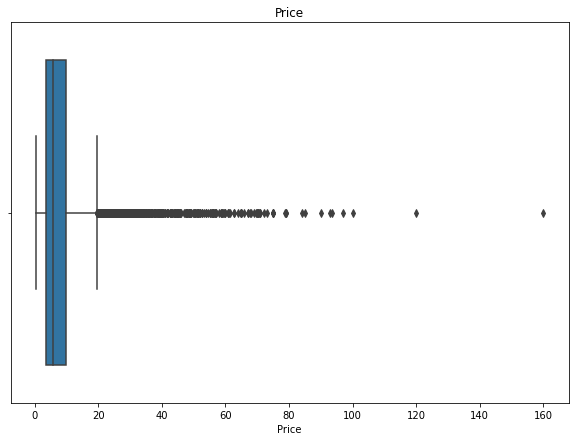

In [ ]:
# Let's check the outliers in Price

plt.figure(figsize=(10,7))
sns.boxplot(data=ucars, x='Price')
plt.title('Price')
plt.show();

In [ ]:
ucars.loc[ucars['Price']>100]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Make,Model
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,5.0,230.0,160.0,Land,Rover
5781,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,2.0,11.3,120.0,Lamborghini,Gallardo


**DECISION:** There are a lot of outliers. However, variables like the price of something or annual salary of someone tend to have many outliers, because there are always something expensive or someone rich compared to average, especially in huge datasets. When I look at the most extreme outliers in Price, I see that even those outliers are meaningful, because Land Rover and Lamborghini Gallardo can be extremely expensive cars. Therefore, I will not drop any of the outliers.

In [ ]:
# Let's check if there is a meaninglessly low values like 0

ucars.loc[ucars['Price']==0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Make,Model


In [ ]:
# Let's check the skewness and distribution of Price

print(ucars['Price'].skew())

3.3352319876668415


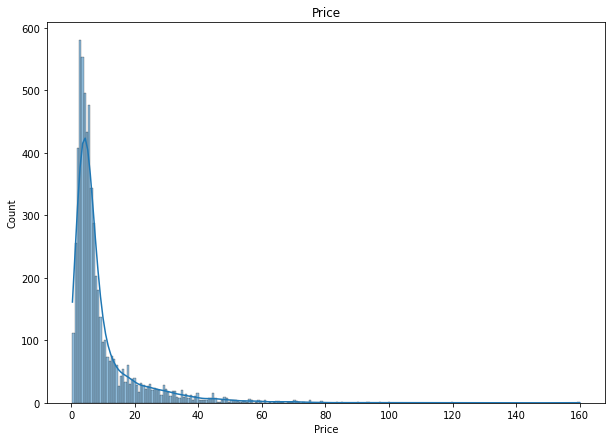

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=ucars, x='Price', kde=True)
plt.title('Price')
plt.show();

Price is extremely positively skewed. I will use log transformation on it. Log transformation works best when a data is positively skewed and there is no negative value or zero.

In [ ]:
# The code below will create a new column called Price_log which includes the log-transformed values of Price
ucars['Price_log']=np.log(ucars['Price'])

In [ ]:
# Let's look at the skewness value of our new variable Price_log

ucars['Price_log'].skew()

# The output below shows that Price_log is slightly positively skewed

0.4173906918413524

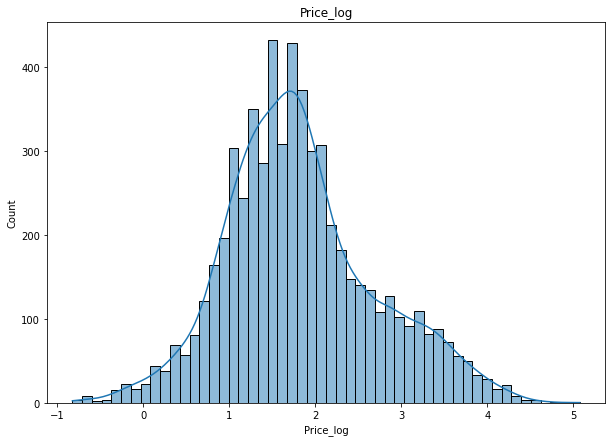

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=ucars, x='Price_log', kde=True)
plt.title('Price_log')
plt.show();

**RESULT:** The highly positively skewed distribution has become mildly skewed and closer to normal distribution. Because Price is my dependent variable, I will not drop the original column. Instead, I will compare the model performance for both Price and Price_log.

##New Price##

In [ ]:
# Let's look at the missing values in New_Price first.

ucars['New_Price'].isnull().sum()

# There is no missing value in New_Price!

0

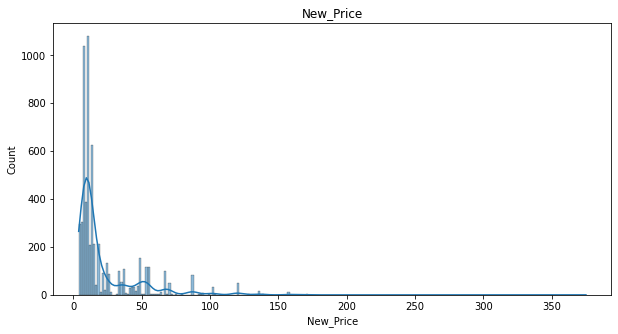

In [ ]:
# Let's look at skewness and distribution of values in New_Price second.

plt.figure(figsize=(10,5))
sns.histplot(data=ucars, x='New_Price', kde=True)
plt.title('New_Price')
plt.show();

In [ ]:
ucars['New_Price'].skew()

3.0356468335223994

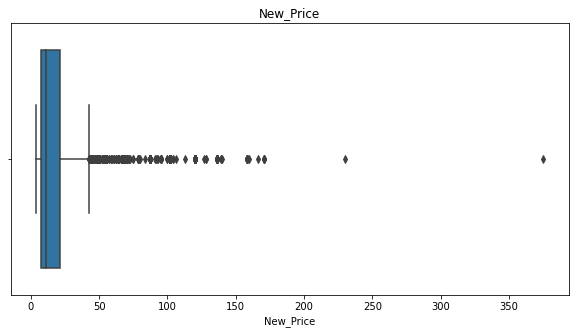

In [ ]:
# Let's look at the outliers in New_Price

plt.figure(figsize=(10,5))
sns.boxplot(data=ucars, x='New_Price')
plt.title('New_Price')
plt.show();

In [ ]:
ucars.loc[ucars['New_Price']>200]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Make,Model,Price_log
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,5.0,230.0,160.0,Land,Rover,5.075174
5521,Hyderabad,2006,48000,Petrol,Automatic,First,8.60,5998.0,4.0,375.0,59.0,Bentley,Continental,4.077537


**DECISION:** Bentley and Land are very expensive cars, so these outliers are meaningful. I will not drop or change them.

We see a similar pattern in New_Price as we saw in Price, because both are prices of something which usually tend to have many outliers. Since it is highly positively skewed, I will use log transformation on it.

In [ ]:
ucars['New_Price_log']=np.log(ucars['New_Price'])

In [ ]:
# Let's check the skewness and distribution of values in New_Price_log

ucars['New_Price_log'].skew()

0.912341532093054

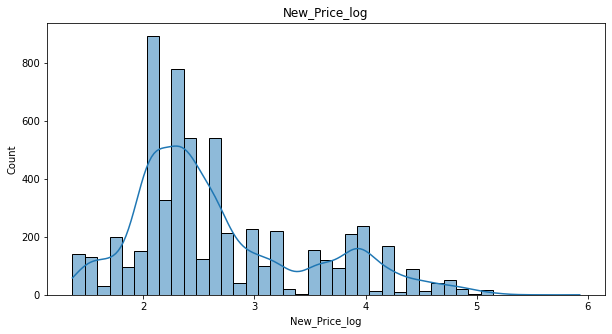

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=ucars, x='New_Price_log', kde=True)
plt.title('New_Price_log')
plt.show();

The log transformed New_Price is still positively skewed (0.9), but significantly less skewed than original New_Price (3.0). Therefore, I will keep this new column and drop the original one.

In [ ]:
ucars.drop(['New_Price'], axis=1, inplace=True)

In [ ]:
ucars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2.019000e+03
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.000000,34000.000000,53000.000000,73000.000000,6.500000e+06
Mileage,6017.0,18.134961,4.582289,0.000000,15.170000,18.150000,21.100000,3.354000e+01
Engine,5983.0,1621.276450,601.355233,72.000000,1198.000000,1493.000000,1984.000000,5.998000e+03
Seats,5977.0,5.278735,0.808840,0.000000,5.000000,5.000000,5.000000,1.000000e+01
Price,6019.0,9.479468,11.187917,0.440000,3.500000,5.640000,9.950000,1.600000e+02
Price_log,6019.0,1.825095,0.874059,-0.820981,1.252763,1.729884,2.297573,5.075174e+00
New_Price_log,6019.0,2.683628,0.797382,1.363537,2.064328,2.424803,3.080533,5.926926e+00


##Year##

First, I want to look at potential outliers and missing values in years.

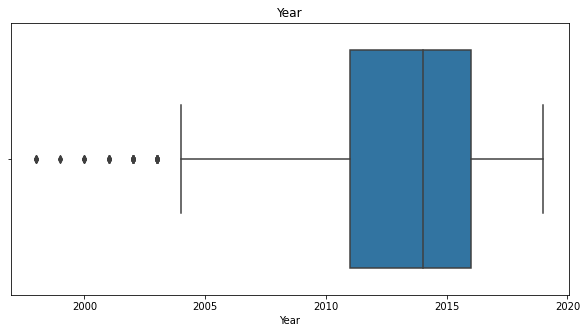

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=ucars, x='Year')
plt.title('Year')
plt.show();

In [ ]:
# As we see from the graph, there are some outliers on the left end, and the descriptive table shows that the minimum value of Years is 1996.
# Therefore, I want to look at the row(s) that include the value 1996 in the relevant column.
ucars.loc[ucars['Year'] < 2000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log
1224,Jaipur,1999,70000,Petrol,Manual,Second,17.3,993.0,5.0,0.77,Maruti,Zen,-0.261365,2.064328
1845,Pune,1999,140000,Petrol,Manual,First,13.0,1343.0,5.0,0.90,Honda,City,-0.105361,2.608598
3138,Jaipur,1998,95150,Petrol,Manual,Third,17.3,993.0,5.0,0.45,Maruti,Zen,-0.798508,2.064328
3749,Mumbai,1998,55300,Diesel,Automatic,First,10.0,1796.0,5.0,3.90,Mercedes-Benz,E-Class,1.360977,4.465563
4709,Hyderabad,1998,104000,Petrol,Manual,Second,15.0,970.0,5.0,0.85,Maruti,1000,-0.162519,2.064328
5716,Jaipur,1998,95150,Petrol,Manual,Third,17.3,993.0,5.0,0.53,Maruti,Zen,-0.634878,2.064328


**DECISION**: These are all meaningful outliers. Therefore, I will not drop the row. 

In [ ]:
ucars['Year'].isnull().sum()

#There is no missing value in Year

0

In [ ]:
# Let's look at the skewness and distribution

ucars['Year'].skew()


-0.8458021355296015

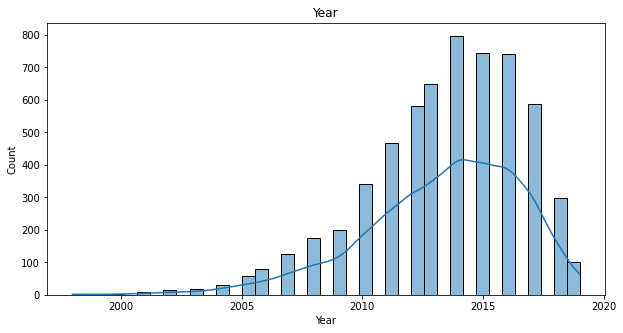

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=ucars, x='Year', kde=True)
plt.title('Year')
plt.show();

Year has a negatively skewed distribution. Let's use log transformation and see if that helps.

In [ ]:
np.log(ucars['Year']).skew()

# Actually, log transformation made it more negatively skewed

-0.851121496573518

In [ ]:
# I will try square root transformation which is preferred for negatively skewed data

np.sqrt(ucars['Year']).skew()

# This made skewness slightly worse as well.

-0.8484599351362093

In [ ]:
np.arcsinh(ucars['Year']).skew()

# Arcsin transformation did not work either

-0.8511214952529982

In [ ]:
np.cbrt(ucars['Year']).skew()

# Cube root transformation did not work either

-0.8493467037700846

**DECISION:** None of the transformations made a significant change in the skewness of Year. It may mean that the outliers in Year is very impactful. However, because those outliers are realistic and meaningful, I will not drop them and use the original column of Year for analysis.

##Kilometers Driven##

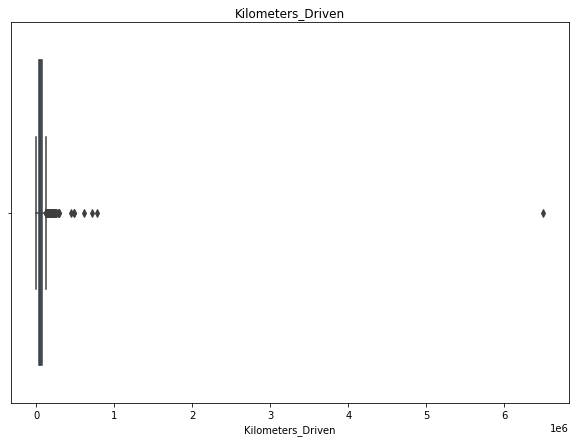

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=ucars, x='Kilometers_Driven')
plt.title('Kilometers_Driven')
plt.show();

It seems that there is a very extreme value that distorts the shape in Kilometers_Driven. 1e6 below the graph means 1 million, so the extreme value is above 6 million. Let's find the values.

In [ ]:
ucars.loc[ucars['Kilometers_Driven'] > 300000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log
340,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,5.0,7.50,Skoda,Octavia,2.014903,3.251537
358,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,5.0,2.70,Hyundai,i10,0.993252,2.327278
1860,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,5.0,5.90,Volkswagen,Vento,1.774952,2.582487
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,5.0,65.00,BMW,X5,4.174387,4.008605
2823,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,5.0,13.00,Volkswagen,Jetta,2.564949,2.317474
3092,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,5.0,5.00,Honda,City,1.609438,2.608598
4491,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,5.0,4.45,Hyundai,i20,1.492904,2.327278


**DECISION:** It is impossible to drive any car for 6500000, especially if it is a 2017 car. Obviously, it is a meaningless outlier. However, the other values of that car seem normal, so I will change the value to NaN, and then I will impute it with median. Other outliers are still meaningful. If a person have business at multiple locations in India, he or she can drive 200 km daily so it would make 80000 km per year, and a 10-year used car would be driven for 800000 km. On the other hand, for the sake of having a normal distribution (so we can use more robust analyses), I will replace all values above 400000 with NaN, and then I will impute them with median value. It is because, although they are realistic outliers, they can greatly distort the data, while not contributing to the prediction of the price much (because they are few in numbers). 

In [ ]:
ucars['Kilometers_Driven'].replace([6500000, 775000,620000,720000,480000,445000], np.NaN, inplace=True)

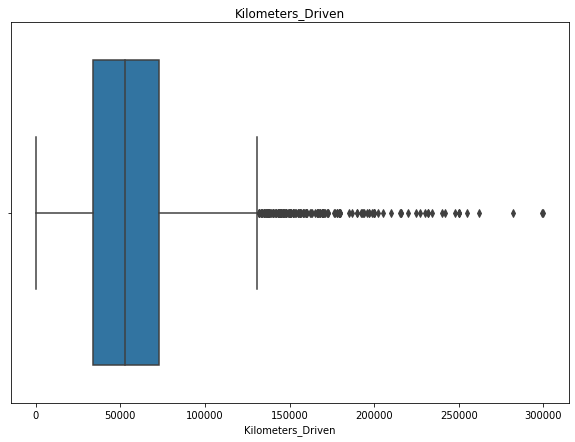

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=ucars, x='Kilometers_Driven')
plt.title('Kilometers_Driven')
plt.show();

In [ ]:
ucars.loc[ucars['Kilometers_Driven'] < 1000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log
1361,Mumbai,2019,171.0,Petrol,Manual,First,24.7,796.0,5.0,3.60,Maruti,Alto,1.280934,1.472472
5606,Mumbai,2019,600.0,Petrol,Automatic,First,21.5,1197.0,5.0,6.25,Maruti,Wagon,1.832581,1.916923


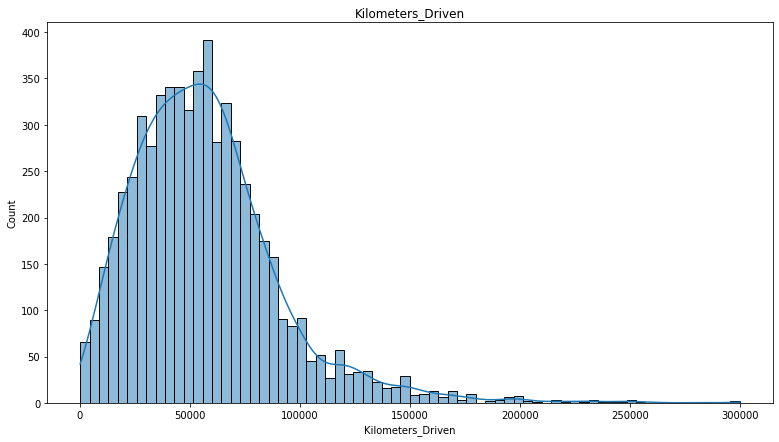

In [ ]:
plt.figure(figsize=(13,7))
sns.histplot(data=ucars, x='Kilometers_Driven', kde=True)
plt.title('Kilometers_Driven')
plt.show();

The graph above reveals a positive skewness, so using log transformation can be helpful to make it normal.

In [ ]:
# I will replace missing values in Kilometers_Driven with the median of that column

ucars['Kilometers_Driven'].fillna(ucars['Kilometers_Driven'].median(), inplace=True)

In [ ]:
print(ucars['Kilometers_Driven'].describe().T)

count      6019.000000
mean      57135.290081
std       33751.354903
min         171.000000
25%       34000.000000
50%       53000.000000
75%       72998.000000
max      300000.000000
Name: Kilometers_Driven, dtype: float64


In [ ]:
ucars['Kilometers_Driven'].skew() # It is a positively skewed distribution.

1.466748238976014

In [ ]:
# The code below allows me to log transform the data.

ucars['Kilometers_Driven_log']=np.log(ucars['Kilometers_Driven'])

In [ ]:
ucars['Kilometers_Driven_log'].skew() # It has become slightly less skewed.

-1.4180144793812246

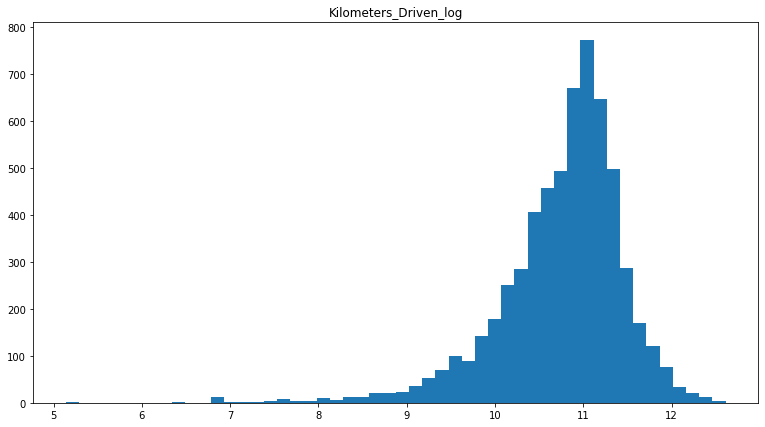

In [ ]:
plt.figure(figsize=(13,7))
plt.hist(ucars['Kilometers_Driven_log'], 50)
plt.title('Kilometers_Driven_log')
plt.show()

ABOVE: It has become a bit negatively skewed, meaning that outliers still impact the distribution. However, because transformed data is closer to having a normal distribution compared to non-transformed column, I will keep it. Also, I will drop the original column to avoid redundancy in variables.

In [ ]:
ucars.drop('Kilometers_Driven', axis=1, inplace=True)

In [ ]:
ucars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2019.000000
Mileage,6017.0,18.134961,4.582289,0.000000,15.170000,18.150000,21.100000,33.540000
Engine,5983.0,1621.276450,601.355233,72.000000,1198.000000,1493.000000,1984.000000,5998.000000
Seats,5977.0,5.278735,0.808840,0.000000,5.000000,5.000000,5.000000,10.000000
Price,6019.0,9.479468,11.187917,0.440000,3.500000,5.640000,9.950000,160.000000
Price_log,6019.0,1.825095,0.874059,-0.820981,1.252763,1.729884,2.297573,5.075174
New_Price_log,6019.0,2.683628,0.797382,1.363537,2.064328,2.424803,3.080533,5.926926
Kilometers_Driven_log,6019.0,10.755607,0.708551,5.141664,10.434116,10.878047,11.198187,12.611538


##Mileage##

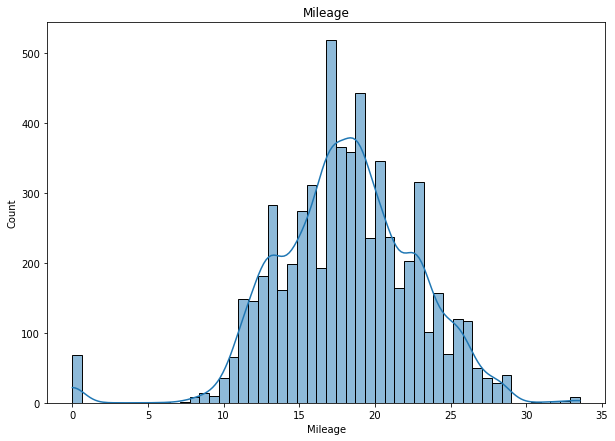

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=ucars, x='Mileage', kde=True)
plt.title('Mileage')
plt.show();

In [ ]:
ucars.loc[ucars['Mileage']==0]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
14,Pune,2012,Diesel,Automatic,Second,0.0,2179.0,5.0,17.50,Land,Rover,2.862201,4.787492,11.350407
67,Coimbatore,2019,Diesel,Automatic,First,0.0,1950.0,5.0,35.67,Mercedes-Benz,C-Class,3.574310,3.894673,9.640108
79,Hyderabad,2005,Petrol,Manual,First,0.0,1086.0,5.0,1.30,Hyundai,Santro,0.262364,1.515127,11.380434
194,Ahmedabad,2007,Petrol,Manual,First,0.0,NaN,NaN,2.95,Honda,City,1.081805,2.608598,11.002200
229,Bangalore,2015,Diesel,Manual,First,0.0,1498.0,NaN,3.60,Ford,Figo,1.280934,2.034706,11.162460
262,Hyderabad,2006,Petrol,Manual,First,0.0,1086.0,5.0,1.75,Hyundai,Santro,0.559616,1.515127,11.502875
307,Chennai,2006,Petrol,Manual,Second,0.0,1086.0,5.0,1.50,Hyundai,Santro,0.405465,1.515127,10.968198
424,Hyderabad,2010,Diesel,Manual,First,0.0,1968.0,5.0,5.45,Volkswagen,Jetta,1.695616,2.317474,10.645925
443,Coimbatore,2012,Petrol,Manual,First,0.0,1086.0,5.0,3.35,Hyundai,Santro,1.208960,1.515127,10.824627
544,Kochi,2019,Petrol,Automatic,First,0.0,1950.0,5.0,38.99,Mercedes-Benz,New,3.663305,3.901771,9.487214


In [ ]:
ucars['Mileage'].skew()

-0.43174214190400223

**DECISION:** Mileage has been defined as the standard mileage offered by the car company in kmpl or km/kg. It refers to the distance that a car can go per liter or kilogram. Therefore, although 0 mileage is possible, if a car is an electric car, the units of mileage (i.e. kmpl and kmkg) in this dataset implies that none of the cars are electric whose unit cannot be liter or kg. Also, all of the cars with 0 mileage have diesel or petrol as fuel type and are old cars, meaning that they are not electric cars. 

Because the variable mileage is very close to a normal distribution, I will impute the values of 0 with the mean of the variable. 

In [ ]:
ucars['Mileage'].median()

18.15

In [ ]:
ucars['Mileage'].replace(0, 18.15, inplace=True)

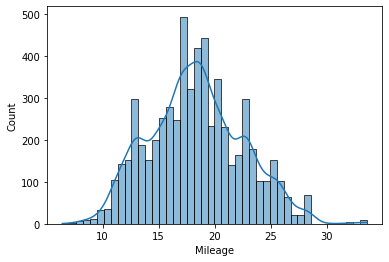

In [ ]:
sns.histplot(data=ucars, x='Mileage', kde=True); # The histogram below shows that the Mileage is mostly normally distributed. 

In [ ]:
ucars['Mileage'].skew() # The output below confirms that the Mileage is mostly normally distributed, because the value is between 0 and [0.5]

0.21344837253578533

In [ ]:
ucars['Mileage'].isnull().sum()

2

In [ ]:
ucars.loc[ucars['Mileage'].isnull()]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
4446,Chennai,2016,Electric,Automatic,First,NaN,72.0,5.0,13.00,Mahindra,E,2.564949,2.608598,10.819778
4904,Mumbai,2011,Electric,Automatic,First,NaN,1798.0,5.0,12.75,Toyota,Prius,2.545531,3.178470,10.691945


In [ ]:
# There is not a pattern of missingness above, therefore I will impute the missing values in Mileage with mean. 

ucars['Mileage'].mean()
ucars['Mileage'].replace(np.NaN, 18.34, inplace=True)

In [ ]:
ucars.loc[ucars['Mileage'].isnull()] #As we see, there is not any missing value anymore.

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log


##Engine and Seats##

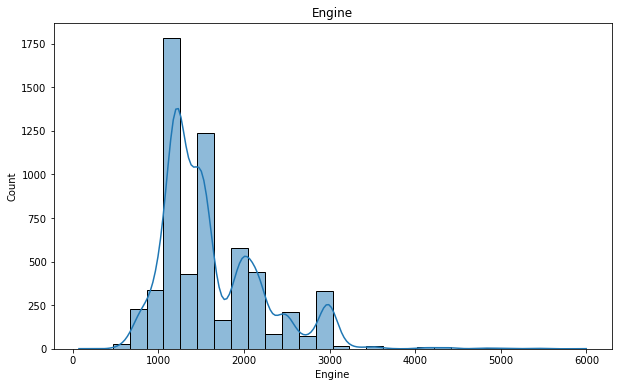

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=ucars, x='Engine', kde=True, bins=30)
plt.title('Engine')
plt.show();

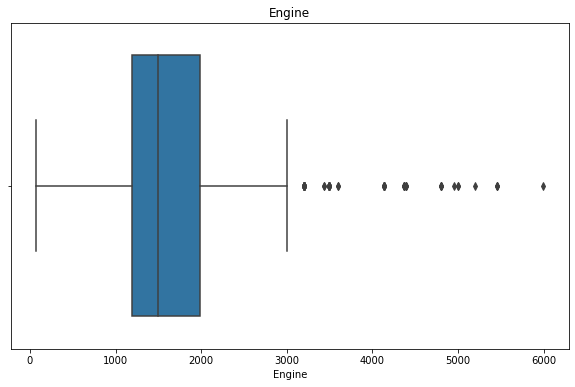

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ucars, x='Engine')
plt.title('Engine')
plt.show();

In [ ]:
ucars['Engine'].skew() #The output below and the graph above shows that Engine is highly positively skewed.

1.421473940493876

In [ ]:
# I want to look at the entries with an Engine value higher than 3000
ucars.loc[ucars['Engine'] > 3000]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
70,Mumbai,2008,Petrol,Automatic,First,8.50,4806.0,5.0,14.50,Porsche,Cayenne,2.674149,4.912655,11.198215
152,Kolkata,2010,Petrol,Automatic,First,7.81,5461.0,5.0,30.00,Mercedes-Benz,S,3.401197,3.901771,10.470986
459,Coimbatore,2016,Diesel,Automatic,First,11.33,4134.0,7.0,48.91,Audi,Q7,3.889982,4.624581,10.839620
586,Kochi,2014,Diesel,Automatic,First,11.33,4134.0,7.0,29.77,Audi,Q7,3.393501,4.624581,11.288856
589,Bangalore,2006,Petrol,Automatic,Second,10.13,3498.0,5.0,19.00,Mercedes-Benz,S,2.944439,3.901771,10.759773
693,Coimbatore,2016,Petrol,Automatic,First,18.10,3498.0,2.0,55.54,Mercedes-Benz,SLK-Class,4.017103,3.901771,10.031529
703,Coimbatore,2017,Diesel,Automatic,First,10.91,3198.0,7.0,31.12,Ford,Endeavour,3.437851,3.563600,10.829412
798,Bangalore,2015,Petrol,Automatic,First,18.10,3498.0,2.0,55.00,Mercedes-Benz,SLK-Class,4.007333,3.901771,9.210340
806,Coimbatore,2017,Diesel,Automatic,First,10.91,3198.0,7.0,29.20,Ford,Endeavour,3.374169,3.563600,10.996015
926,Hyderabad,2010,Petrol,Manual,First,9.00,3436.0,2.0,40.00,Porsche,Cayman,3.688879,4.912655,9.210340


**DECISION:** Because all of the outliers above are meaningful and realistic values (they are high end, luxury cars), I will not drop, change or impute them.

In [ ]:
ucars['Engine'].isnull().sum() #There are 36 missing values

36

In [ ]:
ucars.loc[ucars['Engine'].isnull()] #The below is the entries with missing values in Engine

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
194,Ahmedabad,2007,Petrol,Manual,First,18.15,NaN,NaN,2.95,Honda,City,1.081805,2.608598,11.002200
208,Kolkata,2010,Petrol,Manual,First,16.10,NaN,NaN,2.11,Maruti,Swift,0.746688,2.064328,10.645449
733,Chennai,2006,Petrol,Manual,Third,16.10,NaN,NaN,1.75,Maruti,Swift,0.559616,2.064328,11.490680
749,Mumbai,2008,Diesel,Automatic,Second,18.15,NaN,NaN,26.50,Land,Rover,3.277145,4.787492,10.915107
1294,Delhi,2009,Petrol,Manual,First,12.80,NaN,NaN,3.20,Honda,City,1.163151,2.608598,10.915179
1327,Hyderabad,2015,Petrol,Manual,First,16.10,NaN,NaN,5.80,Maruti,Swift,1.757858,2.064328,10.825661
1385,Pune,2004,Petrol,Manual,Second,18.15,NaN,NaN,1.50,Honda,City,0.405465,2.608598,11.652687
1460,Coimbatore,2008,Petrol,Manual,First,18.15,NaN,NaN,40.88,Land,Rover,3.710641,4.787492,11.142992
2074,Pune,2011,Petrol,Manual,First,16.10,NaN,NaN,3.15,Maruti,Swift,1.147402,2.064328,10.096378
2096,Coimbatore,2004,Petrol,Manual,First,18.15,NaN,NaN,1.93,Hyundai,Santro,0.657520,1.515127,10.861803


In [ ]:
# It seems that all the entries with missing values in Engine has missing values in Seats as well. Let's check the missing values of Seats.

ucars.loc[ucars['Seats'].isnull()] 

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
194,Ahmedabad,2007,Petrol,Manual,First,18.15,NaN,NaN,2.95,Honda,City,1.081805,2.608598,11.002200
208,Kolkata,2010,Petrol,Manual,First,16.10,NaN,NaN,2.11,Maruti,Swift,0.746688,2.064328,10.645449
229,Bangalore,2015,Diesel,Manual,First,18.15,1498.0,NaN,3.60,Ford,Figo,1.280934,2.034706,11.162460
733,Chennai,2006,Petrol,Manual,Third,16.10,NaN,NaN,1.75,Maruti,Swift,0.559616,2.064328,11.490680
749,Mumbai,2008,Diesel,Automatic,Second,18.15,NaN,NaN,26.50,Land,Rover,3.277145,4.787492,10.915107
1294,Delhi,2009,Petrol,Manual,First,12.80,NaN,NaN,3.20,Honda,City,1.163151,2.608598,10.915179
1327,Hyderabad,2015,Petrol,Manual,First,16.10,NaN,NaN,5.80,Maruti,Swift,1.757858,2.064328,10.825661
1385,Pune,2004,Petrol,Manual,Second,18.15,NaN,NaN,1.50,Honda,City,0.405465,2.608598,11.652687
1460,Coimbatore,2008,Petrol,Manual,First,18.15,NaN,NaN,40.88,Land,Rover,3.710641,4.787492,11.142992
1917,Jaipur,2005,Petrol,Manual,Second,13.00,1493.0,NaN,1.70,Honda,City,0.530628,2.608598,11.385092


In [ ]:
ucars['Engine'].corr(ucars['Seats'])

0.39333730600569666

The graph above confirms that almost all entries with a missing value in Engine have missing value in Seats as well. Also, there is a moderate correlation between Engine and Seats based on cutoff values for Pearson's correlation. It makes sense becase more seats mean more passengers, and more passengers require a larger engine that produces more power. 

**DECISION:** Although there is a pattern in missingness in both Engine and Seats, I will impute them with either median or mean rather than dropping them. The pattern in missingness would not impact the prediction of price, because only 36 rows out of over 6000 show the pattern. On the other hand, it does not make sense to lose all the data in those 36 rows just to remove the potentially very little impact of Engine and Seats on Price.

Let's find out if we will use mean or median to impute. We know that we will use median for Engine, because it is highly skewed, but we should look at the skewness of seats as well to make a decision.

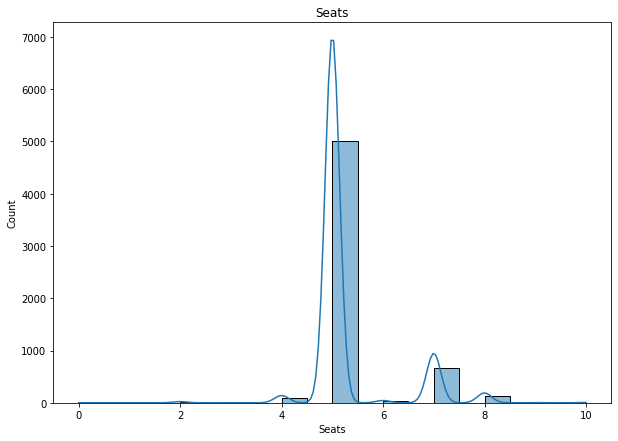

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=ucars, x='Seats', kde=True, bins=20)
plt.title('Seats')
plt.show();

In [ ]:
ucars['Seats'].skew()

1.8357920536773193

In [ ]:
ucars.loc[ucars['Seats'] == 10]

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
814,Pune,2004,Diesel,Manual,Second,13.10,2446.0,10.0,3.50,Toyota,Qualis,1.252763,3.178470,11.261344
917,Mumbai,2013,Diesel,Manual,First,14.07,1978.0,10.0,5.25,Tata,Sumo,1.658228,2.032088,9.903488
1907,Bangalore,2002,Diesel,Manual,Third,13.10,2446.0,10.0,3.65,Toyota,Qualis,1.294727,3.178470,11.050890
2267,Pune,2004,Diesel,Manual,Second,18.15,2446.0,10.0,3.50,Toyota,Qualis,1.252763,3.178470,12.281876
2575,Hyderabad,2015,Diesel,Manual,First,14.80,2499.0,10.0,5.50,Chevrolet,Tavera,1.704748,2.424803,11.695247


**DECISION:** Outliers in Seats are meaningful and realistic, because there are cars that have 6 to 10 seats. For example, Toyota Qualis above is really a 10-seater cars. Therefore, I will make any changes on them and impute NaN in Seats with median.

In [ ]:
ucars['Seats'].fillna(ucars['Seats'].median(), inplace=True)

In [ ]:
ucars['Engine'].fillna(ucars['Engine'].median(), inplace=True)

In [ ]:
print(ucars['Engine'].isnull().sum())
print(ucars['Seats'].isnull().sum())  

# As we see in the output below, none of the two variables has missing values now

0
0


In [ ]:
ucars.loc[ucars['Seats'] == 0]

# O seats is impossible, so I will impute it with median.

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log
3999,Hyderabad,2012,Petrol,Automatic,First,10.5,3197.0,0.0,18.0,Audi,A4,2.890372,3.97293,11.736069


In [ ]:
ucars['Seats'].replace(0, 5, inplace=True)

In [ ]:
# Let's check how their skewness changed

print(ucars['Engine'].skew())
print(ucars['Seats'].skew())



1.4289411744375222
1.9107036119186807


In [ ]:
# Because they are still highly positively skewed, I will log transform them

ucars['Engine_log']=np.log(ucars['Engine'])

In [ ]:
ucars['Seats_log']=np.log(ucars['Seats'])

In [ ]:
# Let's check again how their skewness changed

print(ucars['Engine_log'].skew())
print(ucars['Seats_log'].skew())

0.29835721086659295
0.778421470287475


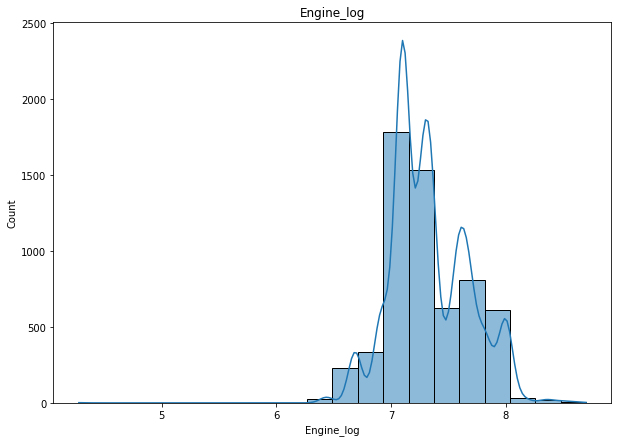

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=ucars, x='Engine_log', kde=True, bins=20)
plt.title('Engine_log')
plt.show();

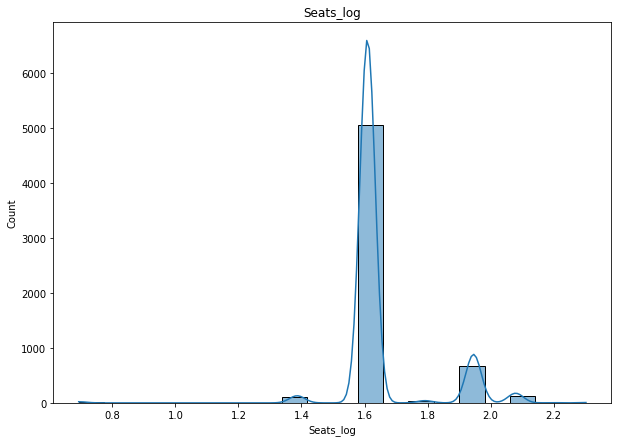

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=ucars, x='Seats_log', kde=True, bins=20)
plt.title('Seats_log')
plt.show();

**Result:** Both the graphs and skewness values show that log transformations made the two variables significantly less skewed. Therefore, I will keep the new columns and drop the original ones.

In [ ]:
ucars.drop(['Seats'], axis=1, inplace=True)

In [ ]:
ucars.drop(['Engine'], axis=1, inplace=True)

In [ ]:
ucars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2019.000000
Mileage,6019.0,18.340080,4.151170,6.400000,15.400000,18.160000,21.100000,33.540000
Price,6019.0,9.479468,11.187917,0.440000,3.500000,5.640000,9.950000,160.000000
Price_log,6019.0,1.825095,0.874059,-0.820981,1.252763,1.729884,2.297573,5.075174
New_Price_log,6019.0,2.683628,0.797382,1.363537,2.064328,2.424803,3.080533,5.926926
Kilometers_Driven_log,6019.0,10.755607,0.708551,5.141664,10.434116,10.878047,11.198187,12.611538
Engine_log,6019.0,7.330726,0.339275,4.276666,7.088409,7.308543,7.585281,8.699181
Seats_log,6019.0,1.653281,0.139534,0.693147,1.609438,1.609438,1.609438,2.302585


#Bivariate Analysis (Only the key relations)# 

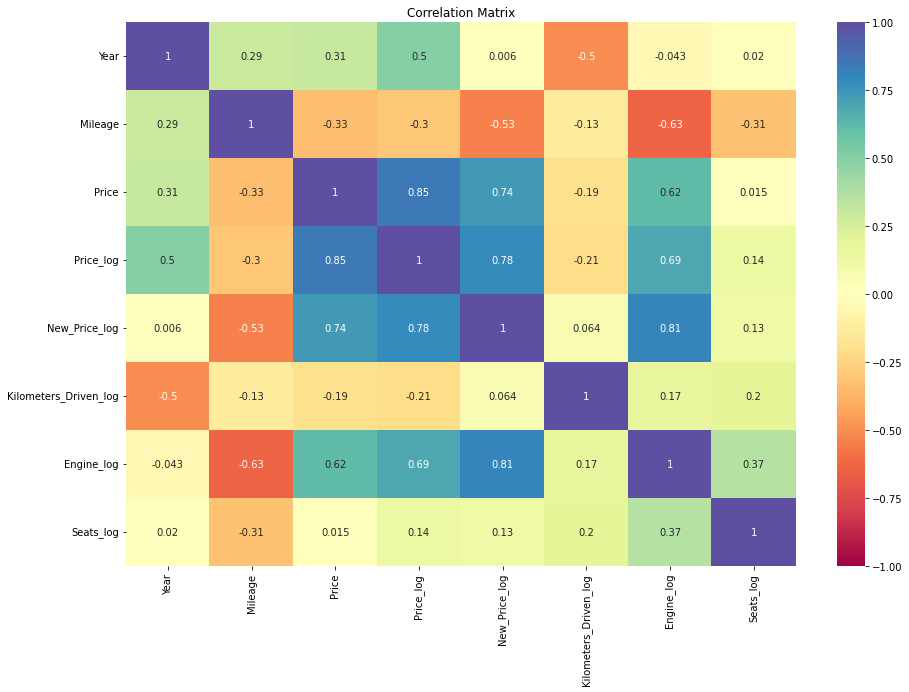

In [ ]:
# Let's first create a correlation matrix and heatmap to see the correlation between each numerical variables

plt.figure(figsize=(15,10))
sns.heatmap(ucars.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# data.corr() gives the correlation of the data (the strength and the direction of the correlation)
# annot=True writes the value of each correlation inside the cells of the correlation matrix
# vmin=-1, vmax=1 makes your graph between -1 and 1, because a correlation value cannot be less than -1 and more than 1. 

The heatmap and the correlation coefficients within each tile show the following:

1- Log transformation of Price increased its correlation with other variables compared to the correlation of original Price with others, and that shows us the importance of normal distribution. Although we dropped the original columns of other transformed variables, we can assume the same pattern for them as well, because they had become less skewed and more normal after transformation.

2- There is a very high correlation between Price and Price_log, which is expected. It can be an example of multicollinearity, which negatively impacts the analysis results under normal conditions. However, because I will use only one of them in regression analysis, the multicollinearity will not be a problem in this case.

3- I may want to drop Seats_log based on its contribution to the model when testing the model performance. It has no correlation or has very low correlation with most of the other variables including Price and Price_log. Also, theoretically, the number of seats may not be a very important that directly impacts the price of a used car. 

4- I will keep other variables, because nearly all of them have some extent of correlation with each other and more importantly, with Price and Price_log.


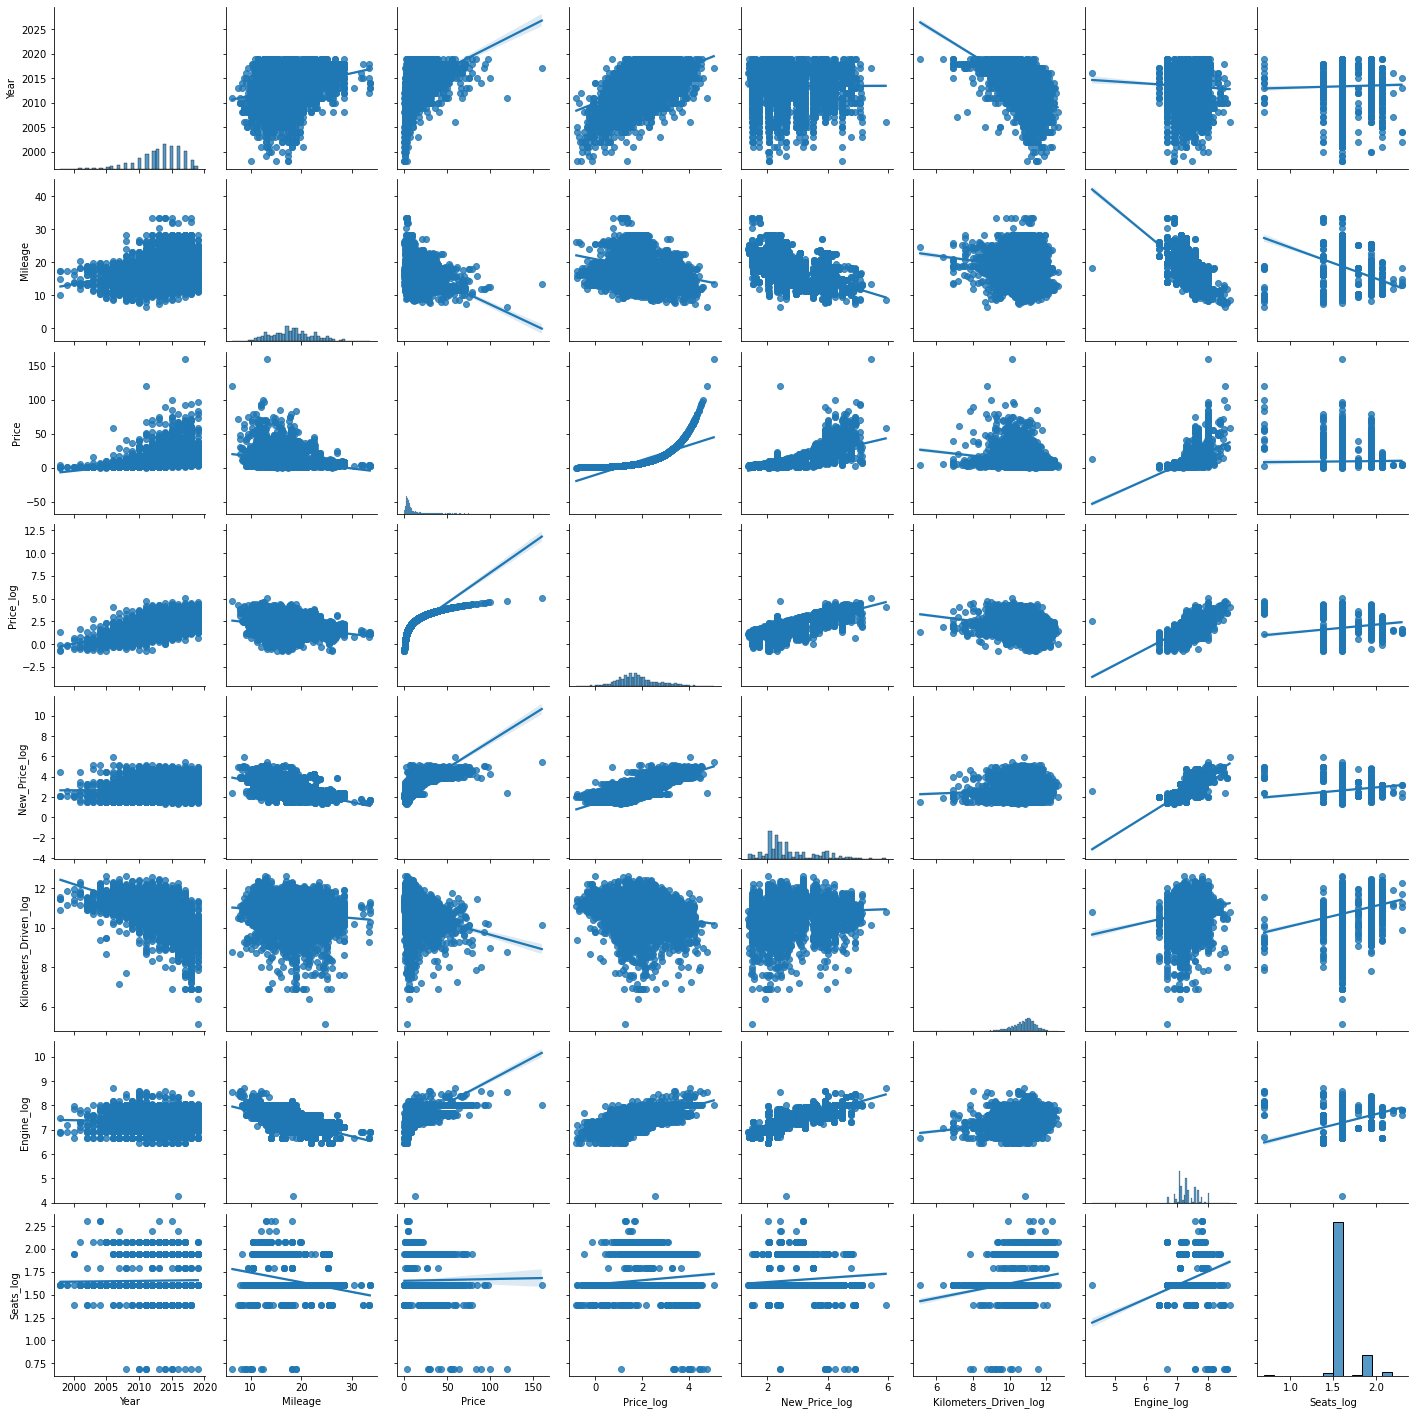

In [ ]:
# Let's visualize the relationship between each variable in a pairplot

sns.pairplot(data=ucars, kind='reg');

**Interpretation:** The most important point that can be made from the scatterplots above is that log transformation has made Price a more suitable variable for regression analysis. The dots are less scattered in Price_log and gathered around the fit line more compared to dots in Price. I predict that model performance will be better when Price_log is the target variable, but we will see if that is true, when testing the model performance.

Not, let's look at the relationship between categorical variables and Price_log. Although I will add Price while testing model performance, I will not spend my time with visualizing its relationship with categorical variables, because Price is highly positively skewed and that would distort the plots.

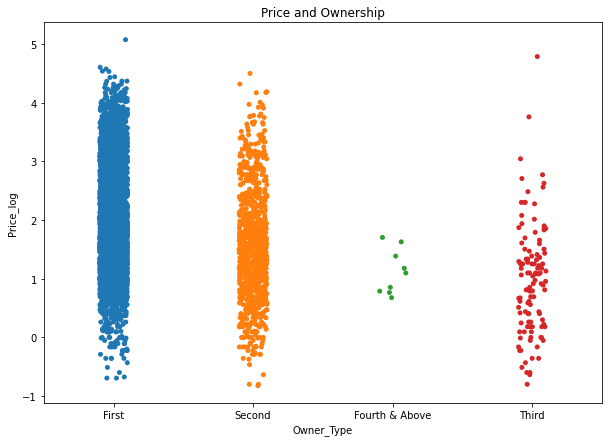

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(data=ucars, x='Owner_Type', y='Price_log')
plt.title('Price and Ownership')
plt.show();

Expectedly, there are significantly more cars, when owners of them are the first ones, and those cars can be sold to higher prices and have wider price range. It goes down and down as a car is sold by a second owner, third owner, and above.

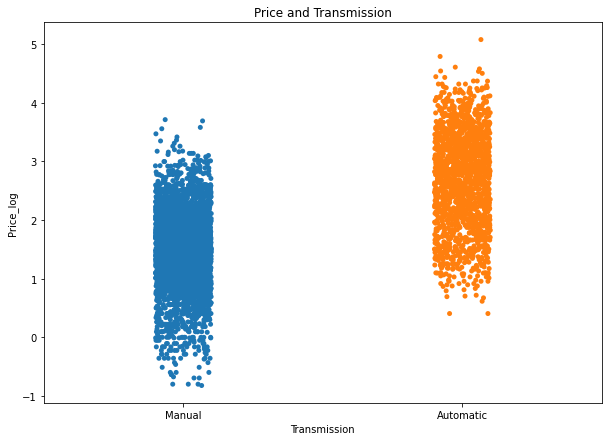

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(data=ucars, x='Transmission', y='Price_log')
plt.title('Price and Transmission')
plt.show();

The plot shows that automatic used cars are more expensive, whereas manual ones tend to be less expensive. This can be an important categorical variable that can impact a used car's price.

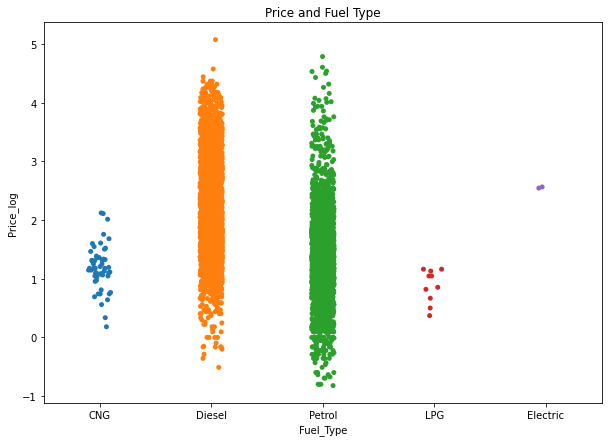

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(data=ucars, x='Fuel_Type', y='Price_log')
plt.title('Price and Fuel Type')
plt.show();

The plot shows that diesel and petrol cars have similar patterns, though diesel cars tend to be slightly more expensive, whereas petrol cars have a wider price range. On the other hand, there are few CNG, LPG, and electric cars in used car market, especially electric being very rare, because it is a new type of fuel for cars. CNG and LPG used cars tend to gather around the average price and stretching slightly below the average and have very narrow price range. 

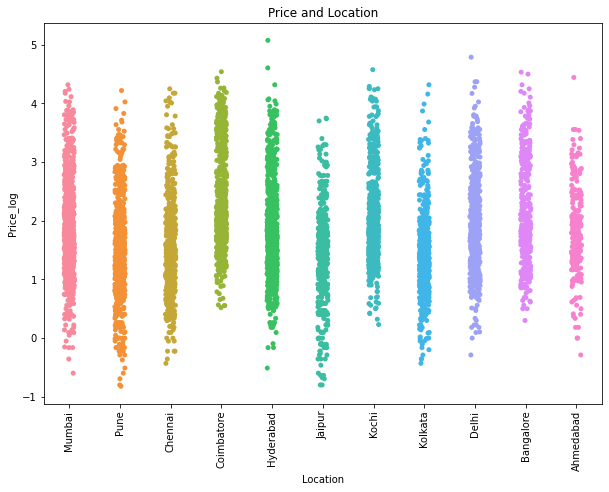

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(data=ucars, x='Location', y='Price_log')
plt.title('Price and Location')
plt.xticks(rotation=90)
plt.show();

We see very similar patterns in price in the context of location. I will not use location in analysis, because I don't think that it is a very important variable in building a model that predicts the price of used cars in India. However, I will keep it for informational and descriptive purposes.

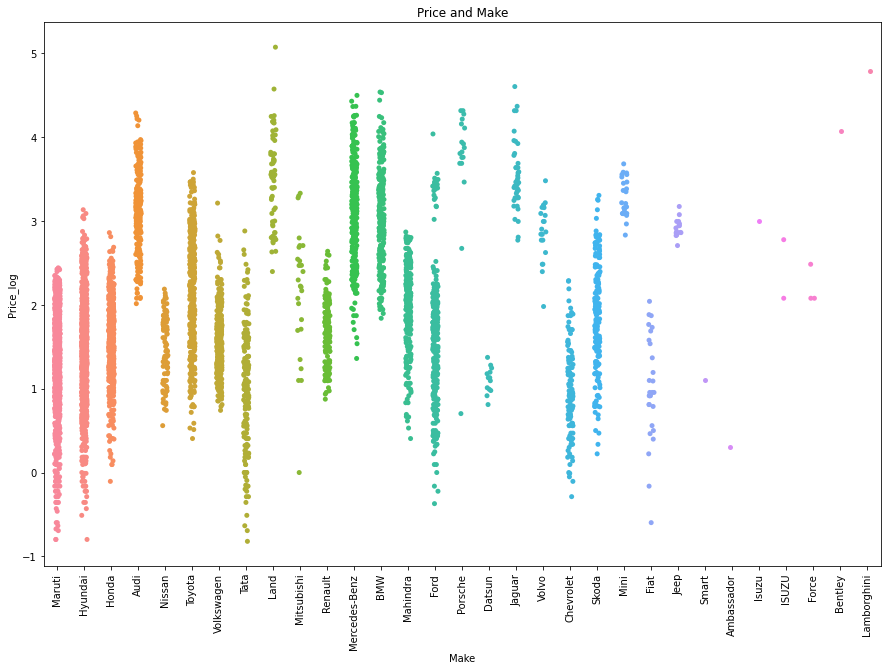

In [ ]:
plt.figure(figsize=(15,10))
sns.stripplot(data=ucars, x='Make', y='Price_log')
plt.title('Price and Make')
plt.xticks(rotation=90)
plt.show();

Make and Model of a car can be an important factor that determines the price of a used car. However, because encoding each type of make or model would create tons of dummy variables, it would make my model unneccesarily complex and possibly overfitting. We do not want that. Also, New_Price_log which is both a numerical and independent variable in my analysis can successfully reflect Make and Model of a car, because car brands that produce luxury cars like Bentley are also more expensive. In other words, although I will not use car make or model, I will use the numerical variable that well-represents those makes and models. 

Let's check if my guess is valid.

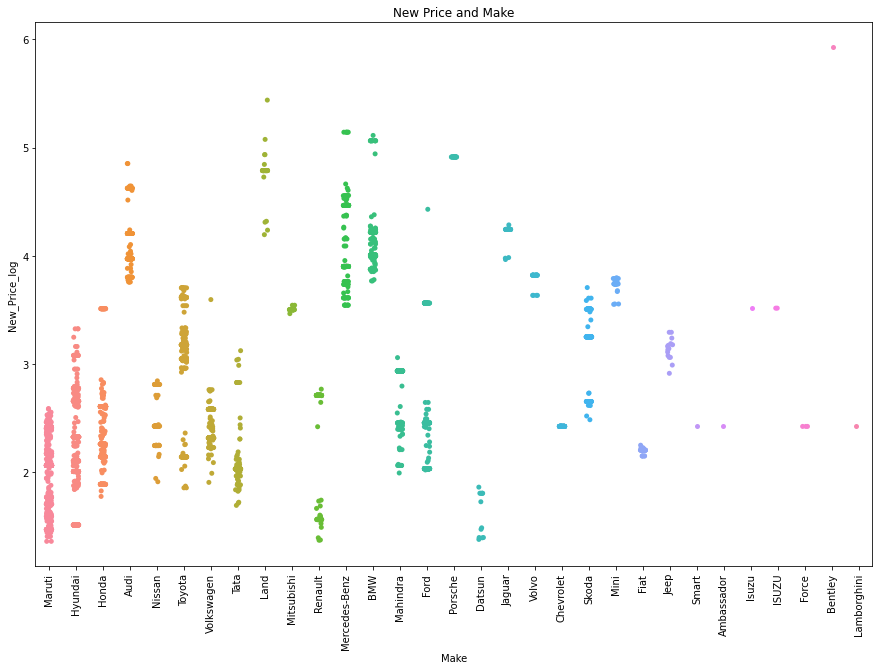

In [ ]:
plt.figure(figsize=(15,10))
sns.stripplot(data=ucars, x='Make', y='New_Price_log')
plt.title('New Price and Make')
plt.xticks(rotation=90)
plt.show();

As we see, luxury cars like Audi, Porsche, or Land are more expensive, whereas budget cars like Tata is cheaper. We can assume the same for Models as well. Therefore, we can use the variable New_Price_log as the numerical reflection of Car make and model.

#Creating dummy variables#

We cannot use strings such as diesel, petrol or such in categorical variables, because they cannot be calculated and go into a mathematical model. However, we cannot replace them only with numerical values such as 1 for diesel, 2 for petrol, or 3 for LPG. Otherwise, we could end up with values like 1.5 in statistical analysis, which would mean that a car is half diesel and half something else, which would be a meaningless interpretation.

To solve this issue, we create dummy variables in new columns that tell us for each participant (or car in this case) whether the claim that a car is diesel is true or false, whether the same car uses petrol as fuel (is it true or false?), or electric (is it true or false?). True is 1, false is 0. Let's do that.

In [ ]:
ucars=pd.get_dummies(ucars, columns=['Fuel_Type'])

In [ ]:
ucars=pd.get_dummies(ucars, columns=['Transmission'])

In [ ]:
ucars=pd.get_dummies(ucars, columns=['Owner_Type'])

In [ ]:
ucars.head()

,Location,Year,Mileage,Price,Make,Model,Price_log,New_Price_log,Kilometers_Driven_log,Engine_log,Seats_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Mumbai,2010,26.60,1.75,Maruti,Wagon,0.559616,1.706565,11.184421,6.905753,1.609438,1,0,0,0,0,0,1,1,0,0,0
1,Pune,2015,19.67,12.50,Hyundai,Creta,2.525729,2.776332,10.621327,7.366445,1.609438,0,1,0,0,0,0,1,1,0,0,0
2,Chennai,2011,18.20,4.50,Honda,Jazz,1.504077,2.152924,10.736397,7.089243,1.609438,0,0,0,0,1,0,1,1,0,0,0
3,Chennai,2012,20.77,6.00,Maruti,Ertiga,1.791759,2.422144,11.373663,7.129298,1.945910,0,1,0,0,0,0,1,1,0,0,0
4,Coimbatore,2013,15.20,17.74,Audi,A4,2.875822,3.972930,10.613246,7.584773,1.609438,0,1,0,0,0,1,0,0,0,1,0


ABOVE: As we can see, there are new columns representing the dummy variables for each subcategory of each categorical variable.

We will drop one of the newly created dummy variables, because any (X-1) of them automatically tells us what value the Xth one is. Therefore, we drop one of them during analysis (not now) to avoid redundancy.

#Building the Model#

Machine learners or data scientists do not much care statistical assumptions such as the assumption of linearity or heteroscedasticity while doing regression or any other type of analysis. Instead, they try to find out the best fitting line for a given dataset by conducting two things. First, they train some of the dataset and then look at whether the model they have found fits well with the one in testing. In other words, they compare the model found in training with the one in testing. They attempt to find out the best analysis and model that can explain a dataset with minimal noise, whereas statisticians first make some assumptions, and then, they apply the proper statistical analysis to the given dataset based on that assumption.

In [ ]:
from sklearn.linear_model import LinearRegression #This import allows you to use linear regression to analyze the dataset
from sklearn.model_selection import train_test_split # This imports the sklearn package that allows you to split data randomly for training and testing

First, we should split the data into two. One will be for training, and the other will be for testing. As a rule of thumb, a higher portion of a dataset is assigned to training. I will split x and y into training and testing groups in randomized way and with a 70:30 ratio. 70 in training, 30 in testing, which is the recommended ratio.

##Using Price_log as the DV##

In [ ]:
# Let's first define our independent variables or predictors. I will drop the ones that I will not use as predictor. The rest will be my predictors.

x=ucars.drop(['Price','Price_log', 'Location','Make','Model','Fuel_Type_Electric','Transmission_Manual','Owner_Type_Third'], axis=1)

# Second, we define our DVs

y=ucars[['Price_log']]

In [ ]:
# I will split x and y into training and testing groups in randomized way and with a 70:30 ratio.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) #random_state randomizes the split, test_size=.30 says that the testing will include 30 percent of the dataset

In [ ]:
# Next, I will fit the regression model

ucars_regression=LinearRegression()
ucars_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Let's find the correlation coefficients of the model

for idx, col_name in enumerate(x_train.columns):
  print('The coefficient for {} is {}'.format(col_name, ucars_regression.coef_[0][idx]))

The coefficient for Year is 0.12304713877471894
The coefficient for Mileage is 0.0015203542710541737
The coefficient for New_Price_log is 0.5149437999153116
The coefficient for Kilometers_Driven_log is -0.05998918196371265
The coefficient for Engine_log is 0.706640703237543
The coefficient for Seats_log is -0.1677936952427899
The coefficient for Fuel_Type_CNG is -0.43354184189458894
The coefficient for Fuel_Type_Diesel is -0.4193464228442977
The coefficient for Fuel_Type_LPG is -0.22140406112258346
The coefficient for Fuel_Type_Petrol is -0.5272225932308204
The coefficient for Transmission_Automatic is 0.21794718818621098
The coefficient for Owner_Type_First is 0.12250646059866535
The coefficient for Owner_Type_Fourth & Above is 0.17841095499986356
The coefficient for Owner_Type_Second is 0.07607471796304396


**Important:** We should be very careful when interpreting those coefficients. If we examined the coefficients from a statistician's perspective, we would say that for each unit increase in Year (meaning that as a car is newer), Price of a car increases by 0.12 unit. However, that interpretation would require that the assumption of independence of IVs was met. This assumption means that the IVs (or predictors) are independent, so coefficients tell us the independent effect of an IV on DV. However, as a machine learner, we do not make assumptions, so we do not know whether the impact of year on price has been confounded by other IVs in the model, because we do not know if IVs are affected from each other or not. Our job is to compare models and find out the best model and analysis, not to make statistical inferences.

In [ ]:
# let's find the intercept

ucars_intercept=ucars_regression.intercept_[0]
print('The intercept for our model is {}'.format(ucars_intercept))

The intercept for our model is -251.2917502554327


Intercept is the value of a dependent variable when all predictors are zero. However, it is not a very meaningful value for the purposes of interpretation, especially when it is a negative value as seen above. 

In [ ]:
# Let's find the R-square (score) for in-sample (train) data.

ucars_regression.score(x_train, y_train) #score function gives out the R-square

0.8916879046741841

In [ ]:
# Let's find the R-square (score) for out-sample (test) data.
ucars_regression.score(x_test, y_test)

0.9049781128616488

**Interpretation:** R-square shows the extent of variance for a dependent variable explained by predictors. In our case, 0.89 means that 89% of variance in Price_log is explained by the predictors (e.g., Mileage, Years, dummy variables etc.). 

The R-square value in testing is higher than the one in training, which is very rare and impressive. It shows that the R-squares in two groups are consistent. Also, the two values are very close, having a difference of less than 1. The R-square in training is slightly lower than the one in testing, showing that the model does not overfit (the model being too complex for the data it tries to fit). It does not seem underfit either (the model being too simple for the data it tries to fit). However, we can still try to improve it by including non-linear (or second order) jumps. Adding interaction terms is a good option.



In [ ]:
# first we import packages that include polynomial features

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly=PolynomialFeatures(degree=2, interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)
poly_new_model=linear_model.LinearRegression()
poly_new_model.fit(x_train2, y_train)
y_pred=poly_new_model.predict(x_test2)
print(poly_new_model.score(x_train2, y_train))

0.9067395986410484


In [ ]:
print(poly_new_model.score(x_test2, y_test))

-959.1701841600153


In [ ]:
print(x_train.shape)
print(x_train2.shape)

(4213, 14)
(4213, 106)


**DECISION:** Inclusion of non-linear variables resulted in a disaster. R-square value for testing was extremely weird (-959?!). Even if it was a meaningful value, I would not still keep non-linear variables, because a potentially little improvement would come at the expense of making our model significantly more complex, because the original model has 14 variables, whereas the model that includes non-linear variables has 106 variables. No need to create an extremely complex model for a very slight improvement. Therefore, I am keeping the model that includes only linear variables. 

##Using Price as the DV##

In [ ]:
x_price=ucars.drop(['Price','Price_log', 'Location','Make','Model','Fuel_Type_Electric','Transmission_Manual','Owner_Type_Third'], axis=1)

y_price=ucars[['Price']]

In [ ]:
x_price_train, x_price_test, y_price_train, y_price_test = train_test_split(x_price, y_price, test_size=0.30, random_state=1)

In [ ]:
ucars_regression=LinearRegression()
ucars_regression.fit(x_price_train, y_price_train)

LinearRegression()

In [ ]:
for idx, col_price_name in enumerate(x_price_train.columns):
  print('The coefficient for {} is {}'.format(col_price_name, ucars_regression.coef_[0][idx]))

The coefficient for Year is 0.893641377260771
The coefficient for Mileage is -0.13159465097873227
The coefficient for New_Price_log is 7.1207391935960915
The coefficient for Kilometers_Driven_log is -1.8914289827440285
The coefficient for Engine_log is 6.53882143250789
The coefficient for Seats_log is -10.593017018410539
The coefficient for Fuel_Type_CNG is 4.500862552201322
The coefficient for Fuel_Type_Diesel is 1.6403826597165283
The coefficient for Fuel_Type_LPG is 6.294814918544271
The coefficient for Fuel_Type_Petrol is 0.5264668866061026
The coefficient for Transmission_Automatic is 2.0164463843197553
The coefficient for Owner_Type_First is -1.6322085465420975
The coefficient for Owner_Type_Fourth & Above is -0.6734172006193686
The coefficient for Owner_Type_Second is -1.7355442812029462


In [ ]:
ucars_intercept=ucars_regression.intercept_[0]
print('The intercept for our model is {}'.format(ucars_intercept))

The intercept for our model is -1816.6995436639017


In [ ]:
ucars_regression.score(x_price_train, y_price_train)

0.6595651877961446

In [ ]:
ucars_regression.score(x_price_test, y_price_test)

0.7159941287715891

In [ ]:
poly=PolynomialFeatures(degree=2, interaction_only=True)
x_price_train2=poly.fit_transform(x_price_train)
x_price_test2=poly.fit_transform(x_price_test)
poly_new_model2=linear_model.LinearRegression()
poly_new_model2.fit(x_price_train2, y_price_train)
y_pred2=poly_new_model2.predict(x_price_test2)
print(poly_new_model2.score(x_price_train2, y_price_train))

0.8620667283525506


In [ ]:
print(poly_new_model2.score(x_price_test2, y_price_test))

-27.420797915228682


##Comparison of the Performance of Two Models##

The R-square of Price_log training model (0.892) is significantly higher than that of Price training model (0.659). Likewise, the R-square of Price_log testing model (0.905) is significantly higher than that of Price testing model (0.716). Also, the difference between R-square training and R-square testing in Price_log model is significantly lower compared to the difference between them in Price model. It means that Price_log model shows a better performance in fitting the real world and minimizing the noise. 

Furthermore, even the R-square value of the Price model with non-linear variables added (0.862) is not higher than that of the Price_log model with only linear variables (0.892). It means that over a hundred predictors in Price model does not explain variance in DV better than 13 predictors in Price_log model explains. Obviously, Price_log better has significantly higher performance in explaining the real world based on the dataset.

#Conclusion#

The model that uses Price_log as the target variable successfully explains the variance in the target variable. In other words, the factors in that model are good indicators of the price of a used car. These factors are the following: Production year of a used car, the mileage of a car in kmpl or km/kg, the displacement volume of the engine in CC, seating capacity, type of fuel a car uses, whether a car is automatic or manual, kilometers that car has been driven, the price of a new car of the same model, and how many owners that a car has changed.

More specifically, I have found that engine is the most important factor that predicts the price of a used car in price. The findings show that price of a used car increases by 0.71 INR Lakhs with each unit of increase in Engine's CC. It makes sense, because an engine with higher CC is more powerful, and cars with more powerful engine have higher speed and performance. Therefore, Cars4U should take into consideration the Engine CC value of a used car, while putting a price on it.

Another predictor similar to Engine is the price of a new car in the same model.The findings show that the price of a used car increases by 0.51 INR Lakhs with each unit of increase in the price of the new car in that model. Again, it makes sense because if a new Audi is expensive than a new Tata, then a used Audi is expected to be expensive than a used Tata, ignoring the influences of other predictors. 

Mileage has been found to be very ineffective in predicting the price of a used car. The findings show that the price of a used car increases by only 0.001 INR Lakhs with each unit of increase in mileage. Therefore, Cars4U can ignore the mileage of a used car when deciding on the prices.